In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA


In [11]:
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

[*********************100%***********************]  1 of 1 completed


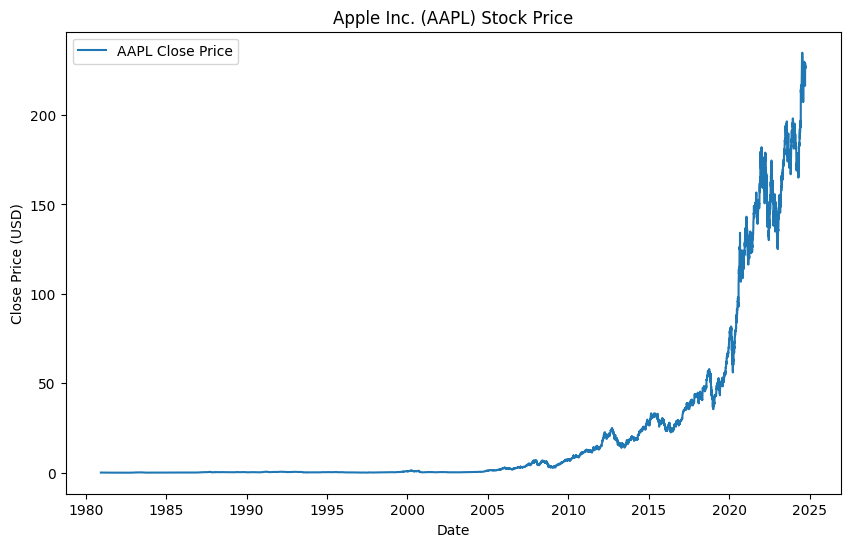

In [23]:
# Download stock data
stock_data = yf.download('AAPL')

# Plot the close price to visualize
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='AAPL Close Price')
plt.title('Apple Inc. (AAPL) Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

adf_test(stock_data['Close'])


ADF Statistic: 3.846621560724662
p-value: 1.0


In [25]:
stock_data['Close_diff'] = stock_data['Close'].diff().dropna()
adf_test(stock_data['Close_diff'].dropna())


ADF Statistic: -17.68897984501599
p-value: 3.579470887476841e-30


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

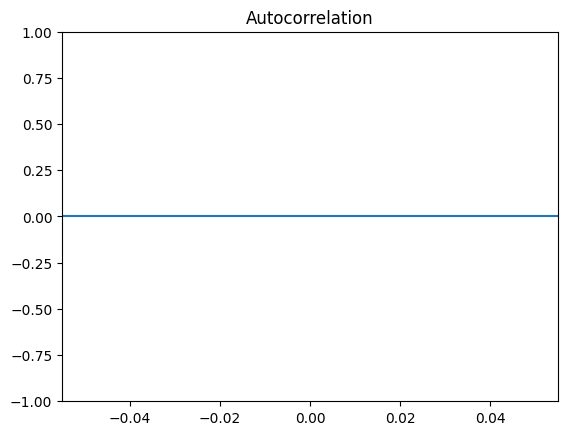

In [26]:
acf = plot_acf(stock_data['Close_diff'])

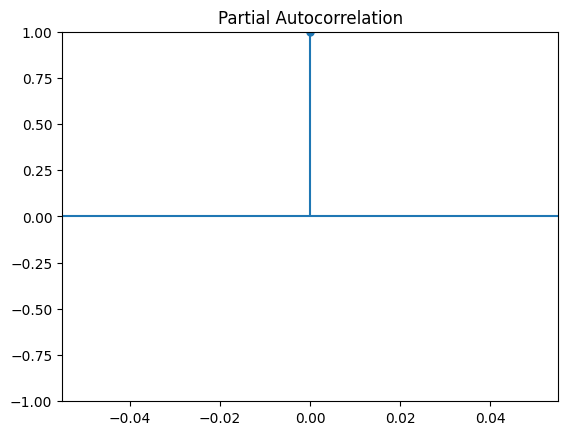

: 

In [27]:
pacf = plot_pacf(stock_data['Close_diff'])

In [20]:
stock_data['Close Second Difference'] = stock_data['Close'] - stock_data['Close'].shift(2)

In [21]:
adf_test(stock_data['Close First Difference'].dropna())

ADF Statistic: -13.593103550398675
p-value: 2.0189199322775279e-25


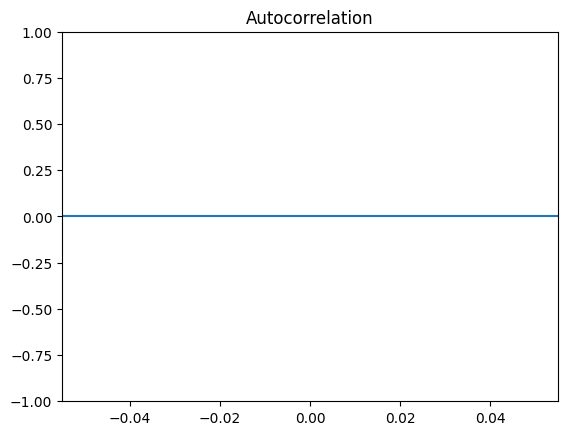

In [22]:
acf = plot_acf(stock_data['Close_diff'])

In [6]:
# Define the ARIMA model
model = ARIMA(stock_data['Close'], order=(5, 1, 5))  # Try different combinations for (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3522
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -6321.053
Date:                Thu, 26 Sep 2024   AIC                          12664.106
Time:                        15:50:03   BIC                          12731.937
Sample:                             0   HQIC                         12688.307
                               - 3522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6859      0.217     -3.163      0.002      -1.111      -0.261
ar.L2         -0.0405      0.316     -0.128      0.898      -0.659       0.578
ar.L3         -0.4412      0.248     -1.778      0.0

c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\saira\Downloads\Portfolio\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

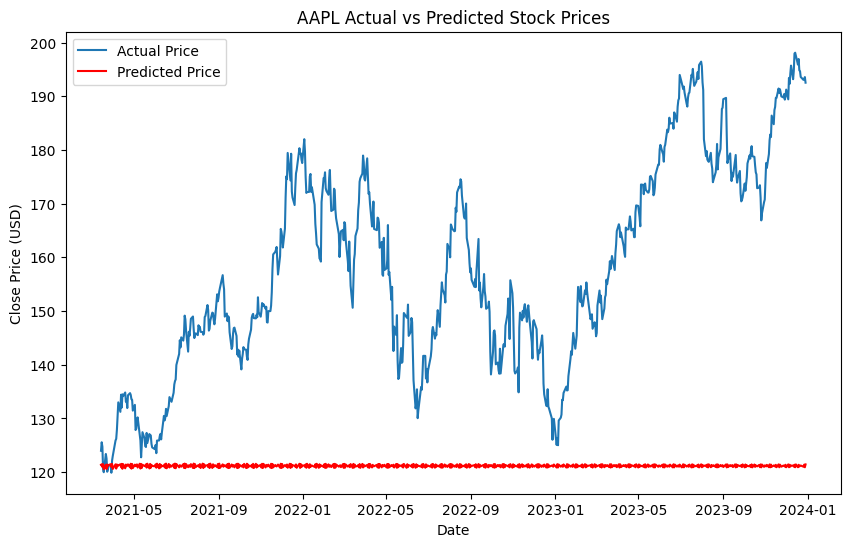

In [8]:
# Split the data into training and testing sets
train_size = int(len(stock_data) * 0.8)
train, test = stock_data['Close'][:train_size], stock_data['Close'][train_size:]

# Fit the model on training data
model = ARIMA(train, order=(5, 1, 5))
model_fit = model.fit()

# Forecast for the test data
forecast = model_fit.forecast(steps=len(test))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Price')
plt.plot(test.index, forecast, label='Predicted Price', color='red')
plt.title('AAPL Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()




In [9]:
# Calculate the error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

NameError: name 'mean_squared_error' is not defined